In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

(uniform-distribution)=
# The Uniform Distribution

The uniform distribution is the most common continuous distribution.
It corresponds to a random variable equally likely to take a value within a given interval.
We write:

$$
X\sim U([0,1]),
$$

and we read $X$ follows a uniform distribution taking values in $[0,1]$.

The PDF of the uniform is constant in $[0,1]$ and zero outside it.
We have:

$$
f_X(x) := U(x|[0,1]) := \begin{cases}
1,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

Here is how you can make this random variable in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html):

In [10]:
import scipy.stats as st
X = st.uniform()

You can evaluate the PDF anywhere like this:

In [11]:
X.pdf(0.5)

1.0

In [12]:
X.pdf(-0.1)

0.0

Here is the plot of the PDF:

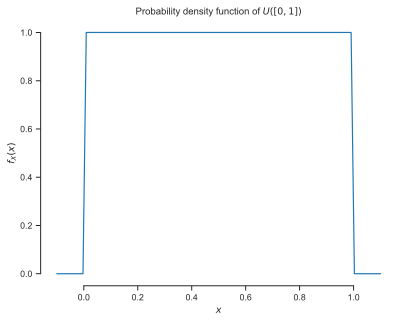

In [13]:
import numpy as np
x = np.linspace(-0.1, 1.1, 100)
plt.plot(x, X.pdf(x))
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.title('Probability density function of $U([0,1])$')
sns.despine(trim=True);

The CDF of the uniform is for $x$ in $[0,1]$:

$$
F(x) = p(X \le x) = \int_0^x f_X(u) du = \int_0^x du = x.
$$

Obviously, we have $F(x) = 0$ for $x < 0$ and $F(x) = 1$ for $x > 1$.

If you have a scipy random variable, you can evaluate the CDF like this:

In [16]:
X.cdf(0.5)

0.5

And here is the plot of the CDF:

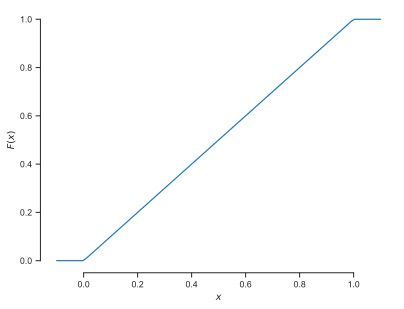

In [17]:
fig, ax = plt.subplots()
ax.plot(x, X.cdf(x))
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
sns.despine(trim=True);

The probability that $X$ takes values in $[a,b]$ for $a < b$ in $[0,1]$ is:

$$
p(a \le X \le b) = F(b) - F(a) = b - a.
$$

The expectation of the uniform is:

$$
\mathbb{E}[X] = \int_0^1 xdx = \frac{1}{2}.
$$

The variance of the uniform is:

$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \left(\mathbb{E}[X]\right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}.
$$

You can get the expectation from scipy like this:

In [18]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 0.50


Similarly for the variance:

In [6]:
# The variance is:
print(f"V[X] = {X.var():.2f}")

V[X] = 0.08


Here is how you can sample from the uniform one hundred times:

In [19]:
X.rvs(size=100)

array([0.09539232, 0.77524467, 0.1165174 , 0.17251136, 0.40433054,
       0.72158   , 0.38796207, 0.06261768, 0.6408136 , 0.18536892,
       0.35787089, 0.81968133, 0.03752348, 0.39551494, 0.24574092,
       0.75824217, 0.9642853 , 0.06583551, 0.08171757, 0.25362503,
       0.72914223, 0.8837704 , 0.02631866, 0.95030773, 0.7060529 ,
       0.8930821 , 0.39822756, 0.82410637, 0.18128167, 0.55625658,
       0.97856713, 0.06468715, 0.97174219, 0.94518788, 0.8766769 ,
       0.02038775, 0.30426117, 0.17927524, 0.13101756, 0.2317204 ,
       0.88418449, 0.45675778, 0.69759984, 0.04638995, 0.13877671,
       0.68515328, 0.70644869, 0.76041054, 0.09915309, 0.99840908,
       0.04972821, 0.58472795, 0.64568846, 0.28645003, 0.28803998,
       0.16994   , 0.3151959 , 0.77308367, 0.37186481, 0.26694347,
       0.73817172, 0.6150509 , 0.61194572, 0.80847813, 0.93691158,
       0.67311239, 0.12722363, 0.18093929, 0.53266398, 0.68873768,
       0.43517983, 0.69703678, 0.04487793, 0.96773282, 0.39516

An alternative way is to use the functionality of numpy:

In [20]:
np.random.rand(100)

array([0.80586055, 0.11824385, 0.16970896, 0.23699974, 0.37712543,
       0.95392772, 0.3167166 , 0.29377652, 0.03252983, 0.12010956,
       0.50480532, 0.74594687, 0.46786984, 0.23535419, 0.76501325,
       0.4868536 , 0.24281247, 0.56834828, 0.73510174, 0.65209475,
       0.40019549, 0.51742407, 0.90883814, 0.07134155, 0.81721201,
       0.03008084, 0.18048499, 0.60085674, 0.04253718, 0.2604787 ,
       0.21244718, 0.97700233, 0.4507617 , 0.5235795 , 0.66534106,
       0.89016926, 0.65434185, 0.97440304, 0.31200708, 0.08642   ,
       0.82021427, 0.66455954, 0.72986889, 0.60272292, 0.59986421,
       0.71106608, 0.02076019, 0.644577  , 0.21984685, 0.83109709,
       0.28888499, 0.19897096, 0.35633719, 0.31888049, 0.88103772,
       0.61011618, 0.78859155, 0.92172975, 0.09794496, 0.26354898,
       0.88442024, 0.14780904, 0.72500108, 0.74646945, 0.64247196,
       0.89706545, 0.28715704, 0.46458434, 0.76452549, 0.07750805,
       0.93848269, 0.56619284, 0.36794383, 0.37993545, 0.39500

Finally, let's find the probability that X is between two numbers.
In particular, we will find $p(-1 \le X \le 0.3)$:

In [21]:
a = -1.0
b = 0.3
prob_X_is_in_ab = X.cdf(b) - X.cdf(a)
print(f"p({a:.2f} <= X <= {b:.2f}) = {prob_X_is_in_ab:.2f}")

p(-1.00 <= X <= 0.30) = 0.30


(uniform-ab)=
## The uniform distribution over an arbitrary interval $[a, b]$

One can define a uniform distribution over an arbitrary interval $[a,b]$.
We write:

$$
X \sim U([a, b]).
$$

The PDF of this random variable is:

$$
f_X(x) = \begin{cases}
c,&\;x\in[a,b],\\
0,&\;\text{otherwise},
\end{cases}
$$

where $c$ is a positive constant.
The formula tells us that the probability density of finding $X$ in $[a,b]$ is positive and that the probability density of finding outside is zero.
We can determine the positive constant $c$ by imposing the normalization condition:

$$
\int_{-\infty}^{+\infty}f_X(x)dx = 1.
$$

Carrying out the integral:

$$
1 = \int_{-\infty}^{+\infty}p(x)dx = \int_a^bc dx = c \int_a^bdx = c (b-a).
$$

Therefore:

$$
c = \frac{1}{b - a},
$$

and we can now write:

$$
f_X(x) = \begin{cases}
\frac{1}{b-a},&x \in [a, b],\\
0,&\;\text{otherwise},
\end{cases}
$$

From the PDF, we can now find the CDF for $x \in [a,b]$:

$$
F(x) = p(X\le x) = \int_{-\infty}^x f_X(u)du = \int_a^x \frac{1}{b-a}du = \frac{1}{b-a}\int_a^xdu = \frac{x-a}{b-a}.
$$

The expectation is:

$$
\mathbb{E}[X] = \frac{1}{2}(a+b),
$$

and the variance is:

$$
\mathbb{V}[X] = \frac{1}{12}(b-a)^2.
$$

Here is how you can do this using ``scipy.stats`` for $a=-2$ and $b=5$:

In [22]:
a = -2.0
b = 5.0
X = st.uniform(loc=a, scale=(b-a))

The PDF is:

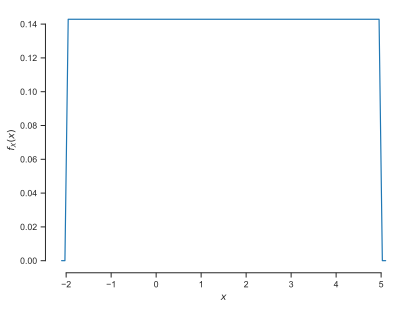

In [33]:
fig, ax = plt.subplots()
xs = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$f_X(x)$")
sns.despine(trim=True);

The CDF is:

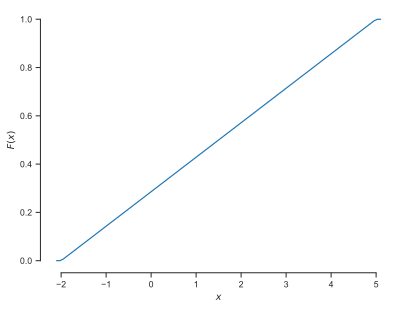

In [24]:
fig, ax = plt.subplots()
xs = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(xs, X.cdf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
sns.despine(trim=True);

The expectation is:

In [25]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 1.50


And the variance:

In [26]:
# The variance is:
print(f"V[X] = {X.var():.2f}")

V[X] = 4.08


And here are a few random samples:

In [27]:
X.rvs(size=100)

array([ 1.44828788,  3.41171026,  2.87684174,  4.8983561 , -0.1312805 ,
       -1.70245574,  2.26979439,  1.6466782 ,  4.34652482,  0.35543454,
        4.53818962, -1.33718623,  0.04536362,  0.41322555,  3.78249496,
        4.68216223,  3.28923988,  2.60780789,  4.18933089,  4.00611092,
        2.57420565,  4.94090822,  1.98921428, -1.49104842,  1.08427018,
        0.77995007, -0.18844224,  0.4527731 , -0.52566889,  1.92956296,
        4.02993221,  4.41533211,  2.00825063,  3.67496822, -1.74089817,
        4.37543734,  3.18883896,  2.05146579, -1.54908546,  3.57873337,
       -1.53078455,  4.10284175, -1.25869879,  4.39609846,  4.08372762,
        1.59054529, -1.88254861, -1.31531624,  2.72709832, -1.72031435,
        4.16180122,  1.2298621 ,  0.90993575, -1.44662087,  4.11556168,
       -0.02735795,  2.34190311,  0.95310295,  3.94416729, -0.37474025,
        2.89650481,  0.32614986,  1.87890769,  2.30208277,  1.70514826,
       -1.2640151 ,  3.98274136, -0.51666423,  0.38175858,  4.50

(uniform-ab-alt)=
## Alternative way to get $U([a,b])$

There is another way to obtain samples from $U([a,b])$ that uses only samples from $U([0,1])$.
Here is how. Let $Z$ be a standard uniform random variable:

$$
Z\sim U([0,1]).
$$

Then define the random variable:

$$
X = a + (b-a) Z.
$$

Then, $X\sim U([a,b])$. Why? Well, let's just show that the CDF of $X$ has the right form:

$$
p(X \le x) = p(a + (b-a)Z \le x) = p((b-a)Z \le x - a) = p\left(Z \le \frac{x-a}{b-a}\right) = \frac{x-a}{b-a},
$$

where the last step follows from the fact that the CDF of $Z$ is simply: $p(Z \le z) = z$.
Equipped with this result, we can sample $X$ by sampling $Z$ and then scaling it appropriately (by the way, this is what ``scipy.stats`` is doing internally). Here it is using ``numpy.random.rand`` to sample in $[0,1]$:

In [28]:
x_samples = a + (b - a) * np.random.rand(1000)
print(x_samples)

[-1.17968315e+00 -9.91679588e-01  1.34411789e+00  1.14593570e+00
  6.37846308e-01 -3.55504159e-01 -1.33171178e+00  1.18303712e+00
  3.20876200e+00  3.19667735e+00 -1.27515305e+00  2.51508002e+00
  6.84081866e-01  2.44487554e+00  4.91615360e+00  3.09205003e+00
  1.44013657e+00  2.15047448e+00 -1.30341195e+00 -4.41178353e-01
  2.59401696e+00  1.98714760e+00  2.01425439e+00  4.96415606e+00
  4.24264777e+00  4.88138233e+00 -1.55005597e+00  1.62766182e+00
 -5.59193830e-01  4.59853007e-01 -1.79581400e+00  2.14846678e+00
  3.30474256e+00 -1.42148694e+00  1.61251214e+00 -1.14294509e+00
 -9.76485259e-01  3.14474495e-01 -1.58248222e+00  1.78018802e-01
  4.13978083e+00 -7.66317089e-01 -2.41124441e-01 -1.14919158e+00
  5.44683158e-01 -1.54367814e-01  3.16869882e+00  2.55781126e+00
  4.81829577e+00  4.12587892e+00  1.03292936e+00  1.59955571e+00
  3.25948809e+00  2.64536298e+00  4.23719619e+00  3.33727502e+00
 -1.00696879e-01  3.57550671e+00  1.51327194e+00  1.04445845e+00
 -1.02823256e+00  3.63510

Let's also do the histogram of x_samples to make sure they are distributed the right way:

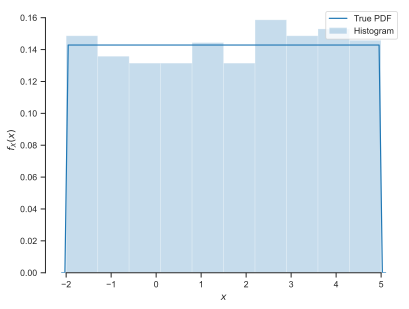

In [32]:
fig, ax = plt.subplots()
ax.plot(xs, X.pdf(xs), label="True PDF")
ax.hist(x_samples, density=True, alpha=0.25, label="Histogram",
        color=sns.color_palette()[0])
ax.set_xlabel("$x$")
ax.set_ylabel("$f_X(x)$")
plt.legend(loc="best")
sns.despine(trim=True);

## Questions

+ Rerun the code above so that the random variable is $U([1, 10])$.